# Simulation - Mô phỏng & Dữ liệu

Trong bài thực hành này, chúng ta sẽ sử dụng python và numpy để tính toán và thực hiện một số mô phỏng.

Những nội dung sẽ thực hiện trong tài liệu này:

- Mô phỏng dữ liệu
- Kiểm tra dữ liệu


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

## MÔ PHỎNG

### Bài 1: Mô phỏng tung đồng xu cân đối

Giả sử một đồng xu có hai mặt `Head` và `Tail`.

a. Định nghĩa hàm `toss_a_fair_coin`để mô phỏng việc tung đồng xu. Kết quả trả về là `H` hoặc `T` tương ứng với một trong hai mặt

```python
def toss_a_fair_coin():
    # ...
```

b. Thực hiện việc tung đồng xu n = 100 lần. Cho biết số lần xuất hiện của mỗi mặt. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên.

In [2]:
# YOUR CODE HERE
#a 
def toss_a_fair_coin():
    return random.choice(['H', 'T'])

Number of heads: 42
Number of tails: 58


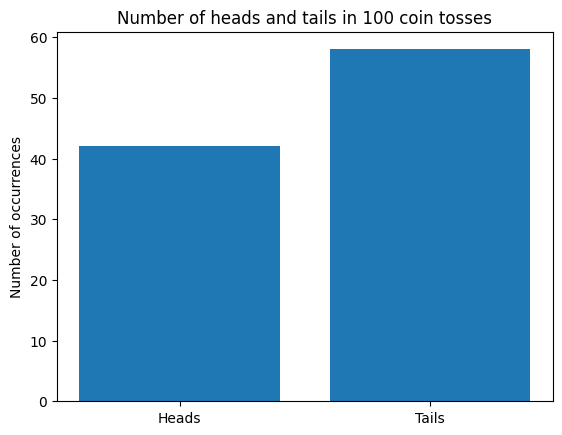

In [3]:
#b

N = 100
cnt_head = 0
cnt_tail = 0

for i in range(N):
    if toss_a_fair_coin() == 'H':
        cnt_head += 1
    else:
        cnt_tail += 1

print(f'Number of heads: {cnt_head}')
print(f'Number of tails: {cnt_tail}')

labels = ['Heads', 'Tails']
plt.bar(labels, [cnt_head, cnt_tail])
plt.ylabel('Number of occurrences')
plt.title('Number of heads and tails in 100 coin tosses')
plt.show()

### Bài 2: Mô phỏng tung đồng xu không cân đối

Giả sử có một đồng xu với hai mặt `H` và `T` không cân đối, với xác suất thu được mặt Head là 0.6, xác suất thu được mặt Tail là 0.4. Bạn hãy:

a. Định nghĩa hàm `toss_a_biased_coin`để mô phỏng việc tung đồng xu. Kết quả trả về là `H` hoặc `T` tương ứng với một trong hai mặt

```python
def toss_a_biased_coin(head_prob):
    '''
    Tung đồng xu không cân đối.
    Return: 'H' or 'T'
        head_prob: xác suất thu được mặt Head
    '''
    # ...
```

b. Thực hiện việc tung đồng xu n = 100 lần. Cho biết số lần xuất hiện của mỗi mặt. Tính tỷ lệ xuất hiện của mặt Head và Tail. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên. 

c. Thực hiện việc tung đồng xu n = 10000 lần. Cho biết số lần xuất hiện của mỗi mặt. Tính tỷ lệ xuất hiện của mặt Head và Tail. Lựa chọn đồ thị phù hợp để hiển thị kết quả trên. 

d. Bạn có nhận xét gì?

In [4]:
# YOUR CODE HERE
#a
def toss_a_biased_coin(head_prob):
    if random.random() < head_prob:
        return 'H'
    else:
        return 'T'

Number of heads: 59
Number of tails: 41
Percentage of heads: 0.59
Percentage of tails: 0.41


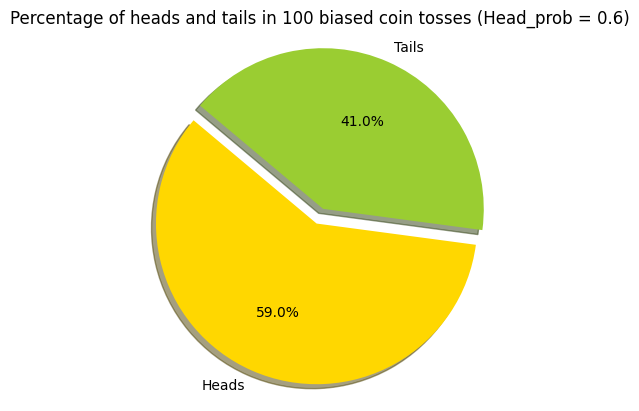

In [5]:
#b 
N = 100
cnt_head = 0
cnt_tail = 0
head_prob = 0.6

for i in range(N):
    if toss_a_biased_coin(head_prob) == 'H':
        cnt_head += 1
    else:
        cnt_tail += 1

per_head = cnt_head/N
per_tail = cnt_tail/N

print(f'Number of heads: {cnt_head}')
print(f'Number of tails: {cnt_tail}')
print(f'Percentage of heads: {per_head:.2f}')
print(f'Percentage of tails: {per_tail:.2f}')

labels = ['Heads', 'Tails']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie([cnt_head, cnt_tail], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of heads and tails in 100 biased coin tosses (Head_prob = 0.6)')
plt.axis('equal')
plt.show()

Number of heads: 6004
Number of tails: 3996
Percentage of heads: 0.60
Percentage of tails: 0.40


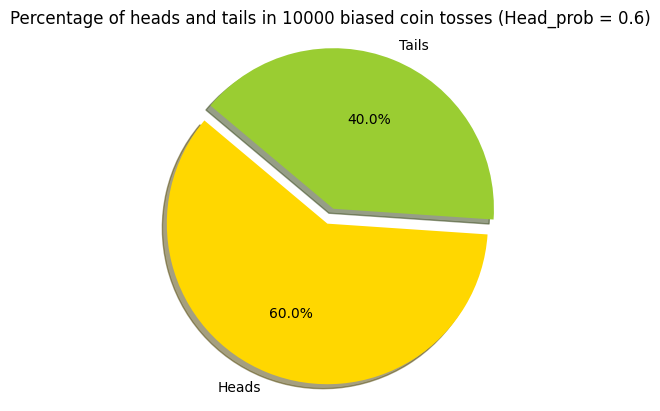

In [41]:
#c 
N = 10000
cnt_head = 0
cnt_tail = 0
head_prob = 0.6

for i in range(N):
    if toss_a_biased_coin(head_prob) == 'H':
        cnt_head += 1
    else:
        cnt_tail += 1

per_head = cnt_head/N
per_tail = cnt_tail/N

print(f'Number of heads: {cnt_head}')
print(f'Number of tails: {cnt_tail}')
print(f'Percentage of heads: {per_head:.2f}')
print(f'Percentage of tails: {per_tail:.2f}')

labels = ['Heads', 'Tails']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)
plt.pie([cnt_head, cnt_tail], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of heads and tails in 10000 biased coin tosses (Head_prob = 0.6)')
plt.axis('equal')
plt.show()

**d**   
 
Từ những ví dụ trên , ta có thể thấy nếu số lần thử càng lớn thì việc chúng ta mô phỏng việc tung đồng xu để xác định số lần xuất hiện của hai mặt sẽ xấp xỉ với xác suất xuất hiện của hai mặt

### Bài 3: Khảo sát hàm randint()

Hàm `randint()`dùng để phát sinh số nguyên ngẫu nhiên. Tuy nhiên, các kết quả ngẫu nhiên này có quy luật nào hay không, liệu ta có thể tin tưởng để sử dụng hàm này không? Trong ví dụ này bạn hãy thực hiện mô phỏng sau: phát sinh `n` số số ngẫu nhiên trong đoạn [1..40]. Với mỗi lần phát sinh bạn hãy vẽ histogram về `tần suất` xuất hiện của mỗi số.

a. Hãy vẽ đồ thị `tần suất` xuất hiện của các số với n=40, n=100, n=10000, n=1000000

b. Hãy đưa ra nhận xét của bạn về hàm `randint()`



In [7]:
# YOUR CODE HERE
def random_range(nums, start, end) :
    lst = []
    for i in range(nums):
        lst.append(random.randint(start, end))
    return lst

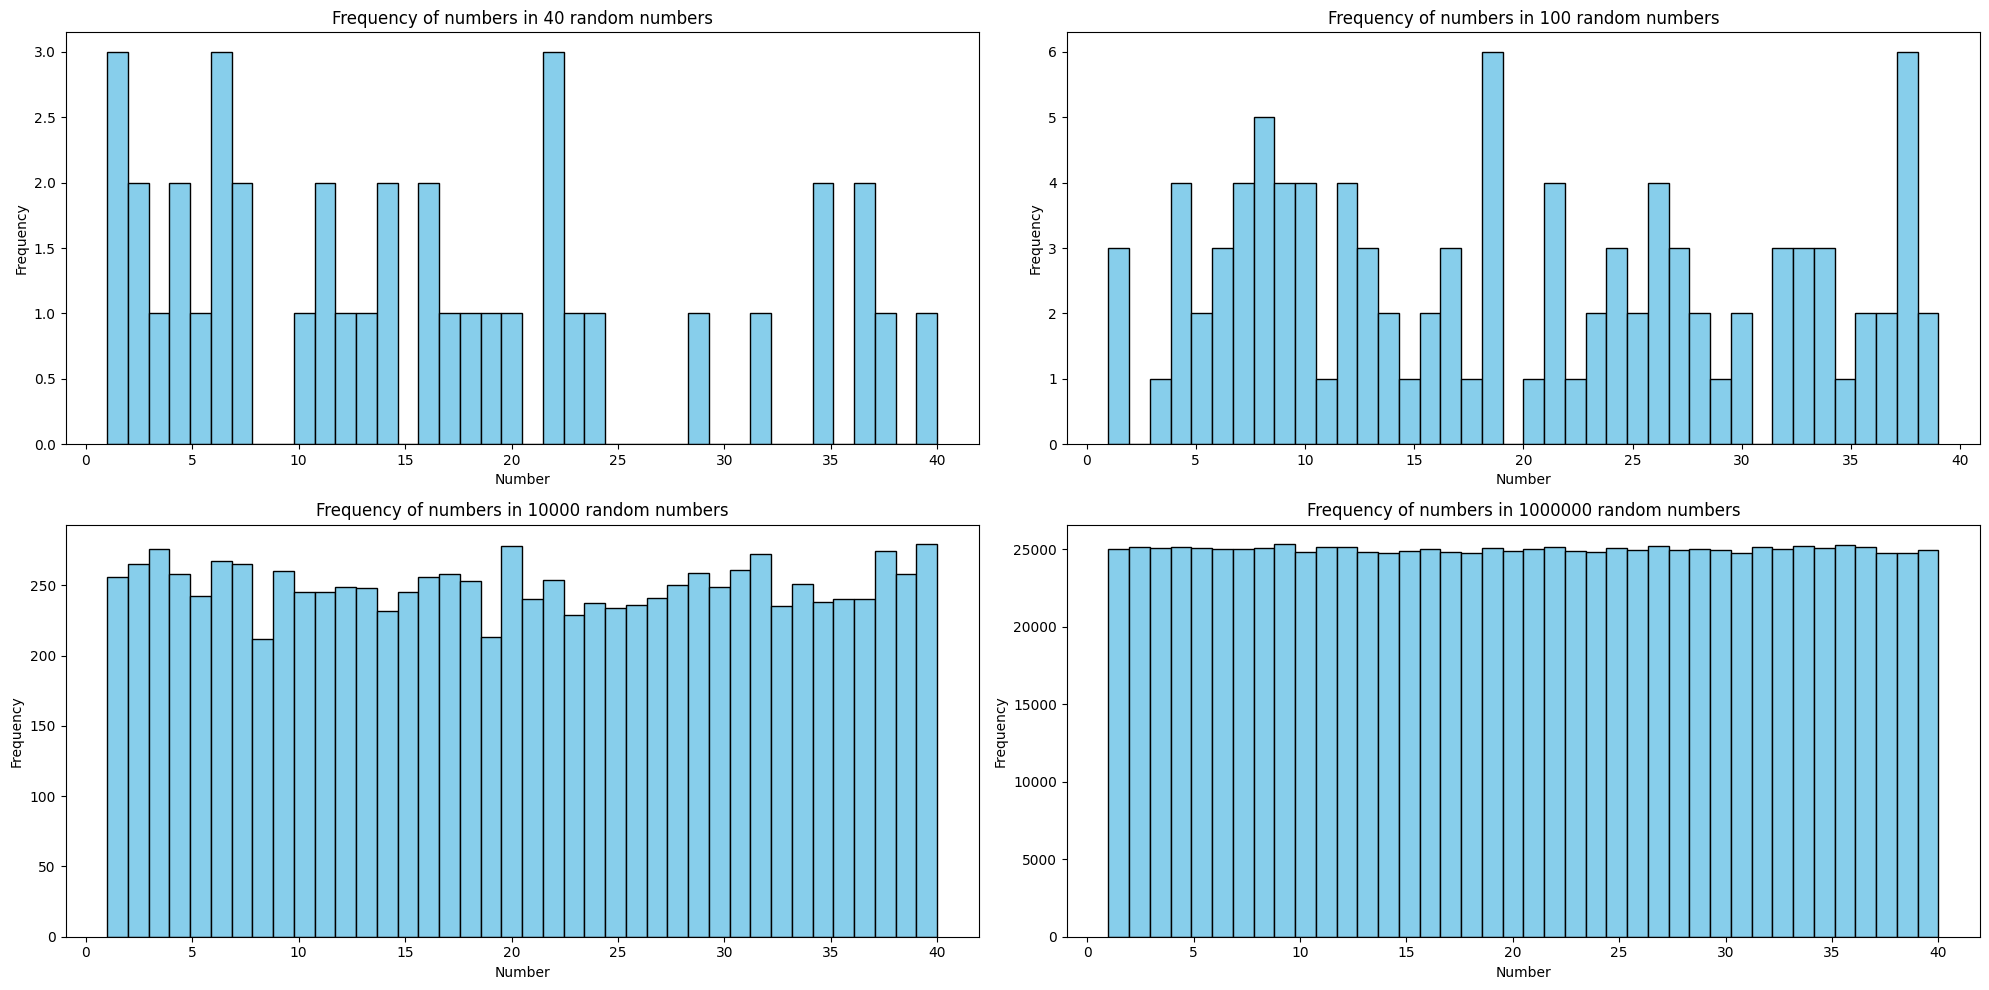

In [8]:
list_N = [40, 100, 10000, 1000000]
plt.figure(figsize=(20, 10))
for i in range(len(list_N)):
    list_nums = random_range(list_N[i], 1, 40)
    plt.subplot(2, 2, i+1)
    plt.hist(list_nums, bins=40, color='skyblue', edgecolor='black')
    plt.title(f'Frequency of numbers in {list_N[i]} random numbers')
    plt.xlabel('Number')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**b**

Hàm $\text{randint()}$ là một hàm phân phối chuẩn, khi chúng ra rand với số lần lớn thì theo luật số lớn , số lần xuất hiện của các số sẽ gần như là xấp xỉ nhau

### Bài 4: Mô phỏng cách chọn mẫu

Trong bài tập này ta sẽ mô phỏng cách lấy mẫu từ một tập đã có sẵn.

a. Sử dụng hàm `randint()` để tạo 10 số ngẫu nhiên nằm trong đoạn [1..100]. Lưu kết quả vào biến `my_arr`

b. Sử dụng hàm `choice` để lấy ngẫu nhiên 5 phần tử từ mảng `my_arr`.

c. Thực hiện câu b, 10 lần. Với mỗi lần bạn hãy hiển thị 5 phần tử được chọn, tính giá trị trung bình và độ lệch chuẩn của các phần tử ấy

In [9]:
# YOUR CODE HERE
# a
def rand_int(nums, start, end):
    lst = []
    for i in range(nums):
        lst.append(random.randint(start, end))
    return lst

my_arr = rand_int(10, 1, 100)

In [10]:
# b
choice_5 = random.choices(my_arr, k=5)
print(f'5 random choices from the array: {choice_5}')

5 random choices from the array: [5, 29, 29, 71, 18]


In [11]:
# c.
for i in range(10):
    choice_5 = random.choices(my_arr, k=5)
    mean = np.mean(choice_5)
    std = np.std(choice_5)
    print(f'5 random choices from the array: {choice_5}')
    print(f'Mean: {mean:.2f}, Standard deviation: {std:.2f}')
    print("-"*50)

5 random choices from the array: [64, 81, 81, 5, 29]
Mean: 52.00, Standard deviation: 30.21
--------------------------------------------------
5 random choices from the array: [18, 71, 92, 5, 71]
Mean: 51.40, Standard deviation: 33.72
--------------------------------------------------
5 random choices from the array: [81, 5, 92, 29, 5]
Mean: 42.40, Standard deviation: 37.22
--------------------------------------------------
5 random choices from the array: [81, 5, 34, 5, 81]
Mean: 41.20, Standard deviation: 34.18
--------------------------------------------------
5 random choices from the array: [5, 67, 34, 29, 92]
Mean: 45.40, Standard deviation: 30.56
--------------------------------------------------
5 random choices from the array: [67, 5, 34, 34, 29]
Mean: 33.80, Standard deviation: 19.77
--------------------------------------------------
5 random choices from the array: [71, 92, 18, 34, 92]
Mean: 61.40, Standard deviation: 30.33
--------------------------------------------------


### Bài 5 Kiểm tra mảng phát sinh

Giả sử chiều cao của người trưởng thành dao động từ 140cm - 210cm.

a. Bạn hãy phát sinh ngẫu nhiên chiều cao của 1000 người và lưu vào mảng `heights`

b. Giả sử ta quy định mức chiều cao như sau:

- Mức thấp: chiều cao bé hơn 160cm
- Mức bình thường: chiều cao từ 160 đến bé hơn 175cm
- Mức cao: chiều cao từ 175cm đến bé hơn 190cm 
- Mức rất cao: chiều cao từ 190cm trở lên

Từ mảng đã phát sinh bạn hãy tính tỷ lệ mỗi mức. Lựa chọn đồ thị phù hợp để biểu diễn.

Number of people with height less than 160 cm: 273
Number of people with height between 160 and 175 cm: 213
Number of people with height between 175 and 190 cm: 199
Number of people with height more than 190 cm: 315
Total number of people: 1000


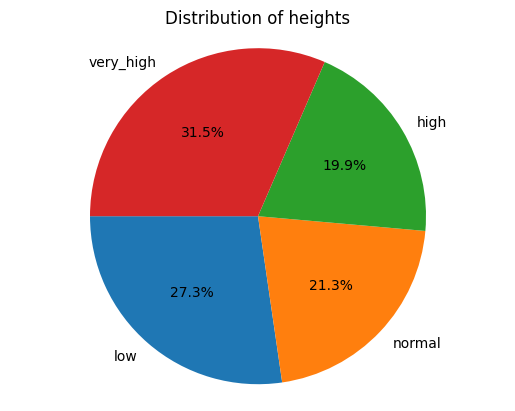

In [12]:
# YOUR CODE HERE
heights = np.array([random.uniform(140, 210) for i in range(1000)])

low = len(heights[heights < 160])
normal = len(heights[(heights >= 160) & (heights < 175)])
high = len(heights[(heights >= 175) & (heights < 190)])
very_high = len(heights[heights >= 190])

print(f'Number of people with height less than 160 cm: {low}')
print(f'Number of people with height between 160 and 175 cm: {normal}')
print(f'Number of people with height between 175 and 190 cm: {high}')
print(f'Number of people with height more than 190 cm: {very_high}')
print(f'Total number of people: {low + normal + high + very_high}')

plt.pie([low, normal, high, very_high],labels=['low', 'normal', 'high', 'very_high'], autopct='%1.1f%%', startangle=180)
plt.title('Distribution of heights')
plt.axis('equal')
plt.show()

## DỮ LIỆU

### Bài 6: dataset `temperature.csv`

Bạn hãy tìm cách đọc dữ liệu về nhiệt độ của các tỉnh thành trên với thư viện `numpy`.

a. Với mỗi tỉnh thành bạn hãy cho biết: nhiệt độ thấp nhất, nhiệt độ cao nhất, nhiệt độ trung bình, độ lệch chuẩn, độ biến thiên về nhiệt độ (`range=max-min`)

b. Vẽ histogram nhiệt độ của TP.HCM

c. Lựa chọn đồ thị để so sánh nhiệt độ của 6 tỉnh thành

In [13]:
# Bạn hãy tìm cách đọc dữ liệu về nhiệt độ của các tỉnh thành trên với thư viện `numpy`.
data = np.genfromtxt('./dataset/temperature.csv', delimiter=',', dtype='str')
print(data)

[['time' 'Ha Noi' 'Vinh' 'Da Nang' 'Nha Trang' 'Ho Chi Minh' 'Ca Mau']
 ['00 15-9-2019' '25.65' '24.79' '24.01' '25.06' '25.48' '24.97']
 ['01 15-9-2019' '25.31' '24.21' '24.02' '24.93' '25.16' '24.83']
 ['02 15-9-2019' '25.05' '23.73' '23.89' '24.79' '24.8' '24.55']
 ['03 15-9-2019' '24.79' '23.36' '23.83' '24.84' '24.74' '24.48']
 ['04 15-9-2019' '24.59' '23.05' '23.69' '24.82' '24.8' '24.38']
 ['05 15-9-2019' '30.8' '22.8' '23.52' '24.79' '24.87' '24.4']
 ['06 15-9-2019' '24.38' '22.79' '23.68' '2.51' '24.71' '24.41']
 ['07 15-9-2019' '26.72' '25.61' '24.92' '26.56' '25.03' '24.91']
 ['08 15-9-2019' '28.84' '26.93' '26.51' '26.53' '25.75' '25.85']
 ['09 15-9-2019' '30.29' '28.72' '27.48' '26.95' '26.64' '26.79']
 ['10 15-9-2019' '31.35' '29.97' '26.96' '27.23' '27.68' '27.53']
 ['11 15-9-2019' '32.05' '28.93' '26.86' '27.38' '28.43' '28.98']
 ['12 15-9-2019' '31.31' '28.94' '26.65' '27.47' '28.29' '29.24']
 ['13 15-9-2019' '30.95' '30.25' '27.83' '27.44' '58' '30.66']
 ['14 15-9-201

In [14]:
# YOUR CODE HERE
# a. Với mỗi tỉnh thành bạn hãy cho biết: nhiệt độ thấp nhất, nhiệt độ cao nhất, nhiệt độ trung bình, độ lệch chuẩn, độ biến thiên về nhiệt độ (`range=max-min`)
for i in range (1,len(data[0])) :
    city = data[0][i]
    temps = data[i][1:].astype(float)
    min_temp = np.min(temps)
    max_temp = np.max(temps)
    mean_temp = np.mean(temps)
    std_temp = np.std(temps)
    range_temp = max_temp - min_temp
    print(f'City: {city}')
    print(f'Min temperature: {min_temp}')
    print(f'Max temperature: {max_temp}')
    print(f'Mean temperature: {mean_temp:.2f}')
    print(f'Standard deviation: {std_temp:.2f}')
    print(f'Range: {range_temp}')
    print("-"*50)



City: Ha Noi
Min temperature: 24.01
Max temperature: 25.65
Mean temperature: 24.99
Standard deviation: 0.53
Range: 1.639999999999997
--------------------------------------------------
City: Vinh
Min temperature: 24.02
Max temperature: 25.31
Mean temperature: 24.74
Standard deviation: 0.47
Range: 1.2899999999999991
--------------------------------------------------
City: Da Nang
Min temperature: 23.73
Max temperature: 25.05
Mean temperature: 24.47
Standard deviation: 0.49
Range: 1.3200000000000003
--------------------------------------------------
City: Nha Trang
Min temperature: 23.36
Max temperature: 24.84
Mean temperature: 24.34
Standard deviation: 0.56
Range: 1.4800000000000004
--------------------------------------------------
City: Ho Chi Minh
Min temperature: 23.05
Max temperature: 24.82
Mean temperature: 24.22
Standard deviation: 0.65
Range: 1.7699999999999996
--------------------------------------------------
City: Ca Mau
Min temperature: 22.8
Max temperature: 30.8
Mean tempera

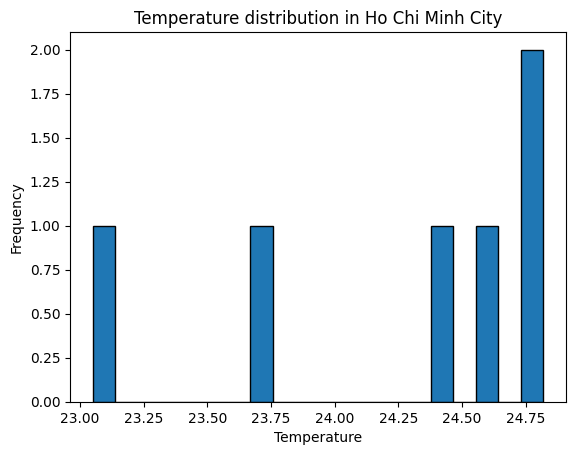

In [15]:
# b. Vẽ histogram nhiệt độ của TP.HCM
hcm_col_index = np.where(data[0] == 'Ho Chi Minh')[0]
idx = int(hcm_col_index[0])
plt.hist(data[idx][1:].astype(float), bins=20,  edgecolor='black')
plt.title('Temperature distribution in Ho Chi Minh City')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


C:\Users\DuongHoan\AppData\Local\Temp\ipykernel_7688\1454241535.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data[1:, 1:].astype(float), labels=city)


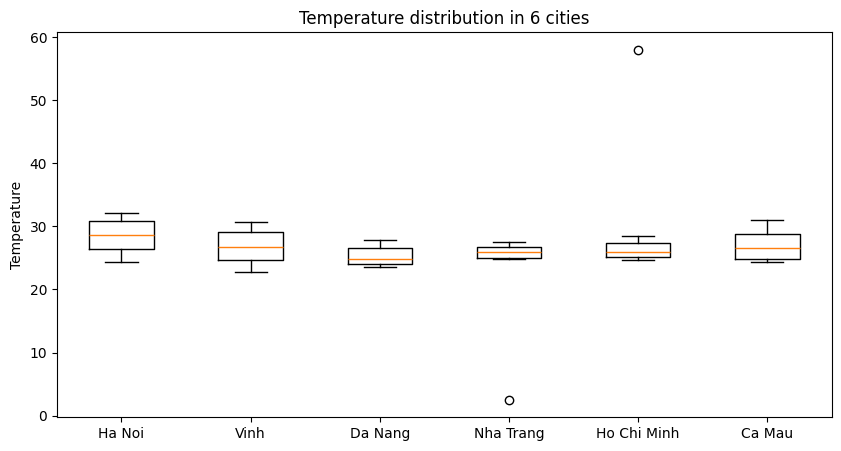

In [16]:
# c. Lựa chọn đồ thị để so sánh nhiệt độ của 6 tỉnh thành
plt.figure(figsize=(10, 5))
city = data[0][1:]

plt.boxplot(data[1:, 1:].astype(float), labels=city)
plt.title('Temperature distribution in 6 cities')
plt.ylabel('Temperature')
plt.show()

### Bài 7: dataset `bmi.csv`

Bạn hãy tìm cách đọc dữ liệu về bmi của nhóm người khảo sát trên với thư viện `numpy`.

a. Hãy cho biết:
    - Tỷ lệ nam nữ
    - Các đại lượng thống kê: min, max, range, mean, standard deviation của hai thuộc tính chiều cao và cân nặng

b. Vẽ đồ thị histogram về chiều cao và cân nặng của hai thuộc tính chiều cao và cân nặng

c. Sử dụng hai đồ thị boxplot để so sánh chiều cao và cân nặng của nam và nữ

d. Để kiểm tra xem hai thuộc tính chiều cao và cân nặng có mối liên quan nào hay không, bạn có thể sử dụng đồ thị tán xạ (scatter plot). Giả sử muốn kiểm tra xem liệu một người cao hơn thì có cân nặng lớn hơn hay không, bạn hãy vẽ đồ thị scatter plot với trục hoành là chiều cao và trục tung là cân nặng

In [17]:
# YOUR CODE HERE
bmi_data = np.genfromtxt('./dataset/bmi.csv', delimiter=',', dtype='str')
print(bmi_data)

[['Personal' 'Gender' 'Height_cm' 'Weight_kg']
 ['P1' 'Male' '174' '96']
 ['P2' 'Male' '189' '87']
 ...
 ['P498' 'Female' '141' '136']
 ['P499' 'Male' '150' '95']
 ['P500' 'Male' '173' '131']]


In [18]:
# a
gender = bmi_data[:, 1]
cnt_male =len([i for i in gender if i == "Male"])
cnt_female = len([i for i in gender if i == "Female"])

min_weight = np.min(bmi_data[1:, 3].astype(float))
max_weight = np.max(bmi_data[1:, 3].astype(float))
mean_weight = np.mean(bmi_data[1:, 3].astype(float))
std_weight = np.std(bmi_data[1:, 3].astype(float))

min_height = np.min(bmi_data[1:, 2].astype(float))
max_height = np.max(bmi_data[1:, 2].astype(float))
mean_height = np.mean(bmi_data[1:, 2].astype(float))
std_height = np.std(bmi_data[1:, 2].astype(float))

print(f"Percentage of male : {cnt_male/(len(bmi_data) - 1)*100:.2f}%")
print(f"Percentage of female : {cnt_female/(len(bmi_data) - 1)*100:.2f}%")
print(f'Minimum weight: {min_weight}')
print(f'Maximum weight: {max_weight}')
print(f'Mean weight: {mean_weight:.2f}')
print(f'Standard deviation of weight: {std_weight:.2f}')
print(f'Minimum height: {min_height}')
print(f'Maximum height: {max_height}')
print(f'Mean height: {mean_height:.2f}')
print(f'Standard deviation of height: {std_height:.2f}')


Percentage of male : 49.00%
Percentage of female : 51.00%
Minimum weight: 50.0
Maximum weight: 160.0
Mean weight: 106.00
Standard deviation of weight: 32.35
Minimum height: 140.0
Maximum height: 199.0
Mean height: 169.94
Standard deviation of height: 16.36


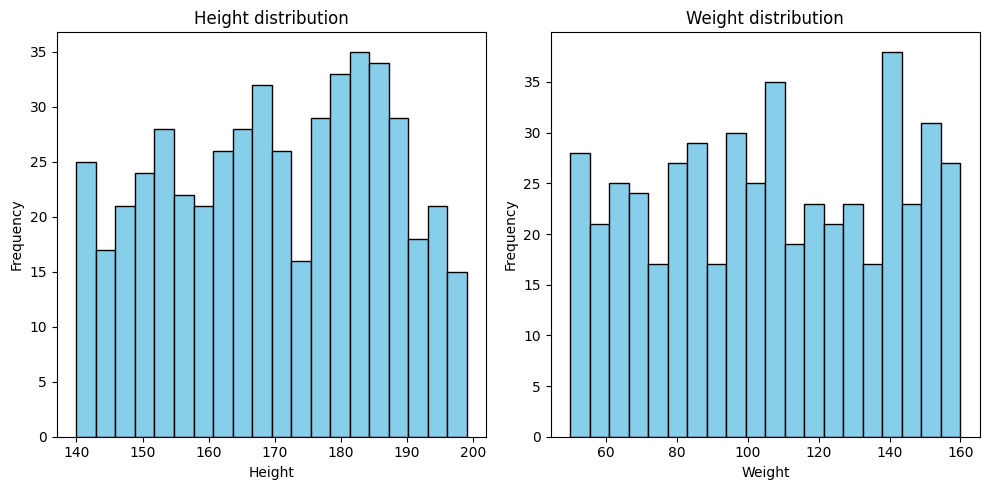

In [19]:
# b. Vẽ đồ thị histogram về chiều cao và cân nặng của hai thuộc tính chiều cao và cân nặng
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bmi_data[1:, 2].astype(float), bins=20, color='skyblue', edgecolor='black')
plt.title('Height distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(bmi_data[1:, 3].astype(float), bins=20, color='skyblue', edgecolor='black')
plt.title('Weight distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\DuongHoan\AppData\Local\Temp\ipykernel_7688\889537451.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([bmi_data[1:,2].astype(float), bmi_data[1:,3].astype(float)], labels=['Height', 'Weight'])


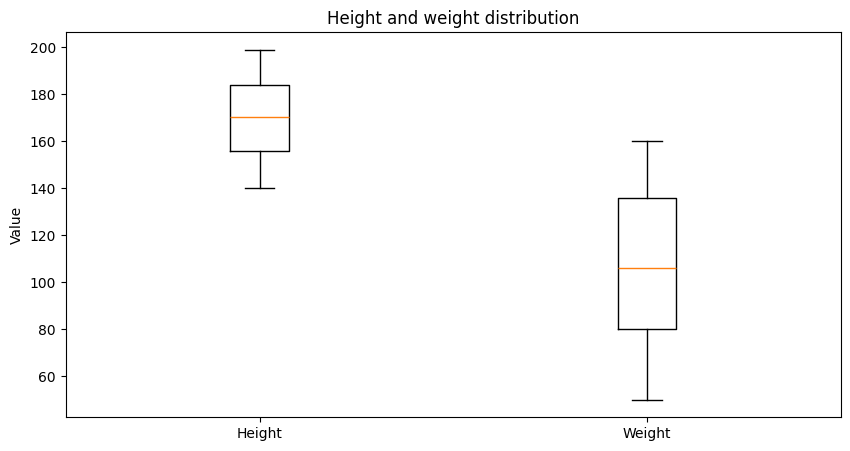

In [20]:
# c. Sử dụng hai đồ thị boxplot để so sánh chiều cao và cân nặng của nam và nữ
plt.figure(figsize=(10, 5))
plt.boxplot([bmi_data[1:,2].astype(float), bmi_data[1:,3].astype(float)], labels=['Height', 'Weight'])
plt.title('Height and weight distribution')
plt.ylabel('Value')
plt.show()


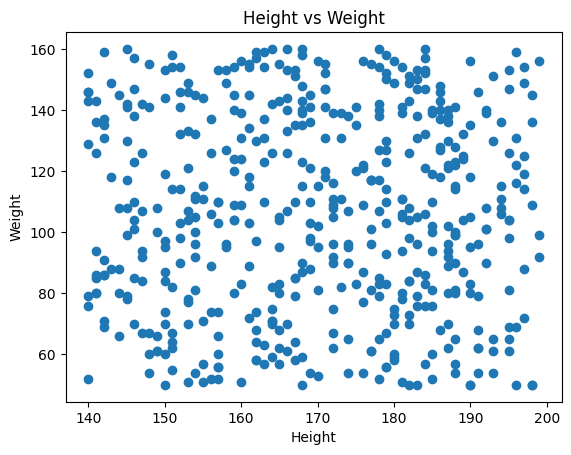

In [21]:
'''
d. Để kiểm tra xem hai thuộc tính chiều cao và cân nặng có mối liên quan nào hay không, bạn có thể sử dụng đồ thị tán xạ (scatter plot). 
Giả sử muốn kiểm tra xem liệu một người cao hơn thì có cân nặng lớn hơn hay không, 
bạn hãy vẽ đồ thị scatter plot với trục hoành là chiều cao và trục tung là cân nặng
'''
plt.scatter(bmi_data[1:, 2].astype(float), bmi_data[1:, 3].astype(float))
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## KHÁC

### Bài 8: Mô phỏng điểm bài kiểm tra

Giả sử điểm bài kiểm tra của học sinh có điểm môn Toán [0..10], với các phần lẻ có thể có là [0.25, 0.5, 0.75]

a. Dùng hàm ngẫu nhiên để phát sinh điểm số của một lớp học gồm của 10 học sinh. Tính điểm trung bình của lớp đó.

b. Giả sử một trường có 50 lớp học. Mỗi lớp học có 40 học sinh. Bạn hãy phát sinh ngẫu nhiên điểm của các học sinh trong 50 lớp học này

c. Giả sử nhà trường muốn thống kê tình hình học tập của 50 lớp học này. Nhà trường tiến hành thống kê bằng cách lấy điểm trung bình của tất cả các lớp học. Bạn hãy vẽ histogram điểm trung bình của 50 lớp học này. 

In [22]:
# YOUR CODE HERE
# a 
math_score = []
for i in range (11) :
    math_score.append(float(np.random.randint(0, 10) + np.random.choice([0.25, 0.5, 0.75])))

avg_score = np.mean(math_score) 
print(f'Math scores: {math_score}')
print(f'Average score: {avg_score:.2f}')

Math scores: [8.25, 2.5, 8.25, 2.75, 1.75, 1.75, 6.75, 8.25, 1.75, 2.75, 0.75]
Average score: 4.14


In [23]:
# b
class_50 =  []
for i in range(50) :
    math_score = []
    for j in range(40) :
        math_score.append(float(np.random.randint(0, 10) + np.random.choice([0.25, 0.5, 0.75])))
    class_50.append(math_score)

print(class_50[0])

[1.25, 4.25, 2.25, 2.5, 0.75, 4.5, 6.75, 5.25, 4.75, 2.75, 8.5, 8.5, 9.75, 2.75, 6.25, 8.25, 5.25, 4.25, 3.25, 1.25, 6.75, 0.75, 5.25, 5.5, 7.75, 0.75, 6.75, 9.5, 2.25, 1.25, 5.75, 5.5, 5.5, 4.5, 4.5, 5.75, 9.25, 9.75, 3.5, 8.25]


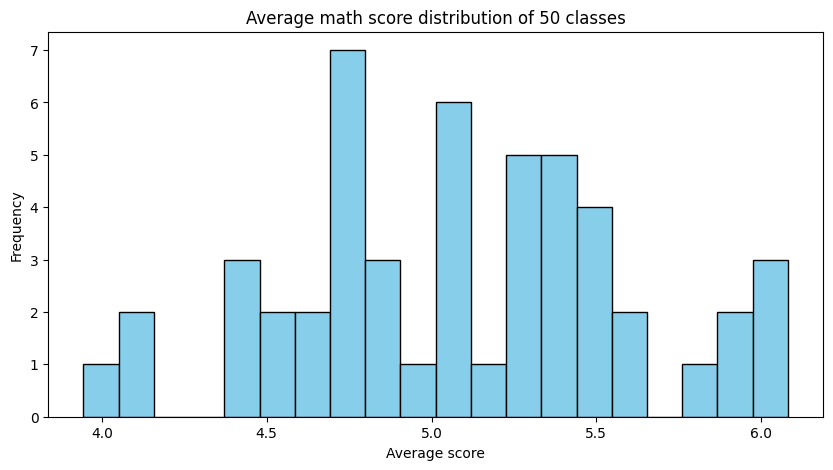

In [24]:
'''
c. Giả sử nhà trường muốn thống kê tình hình học tập của 50 lớp học này. Nhà trường tiến hành thống kê bằng cách lấy điểm trung bình của tất cả các lớp học. 
Bạn hãy vẽ histogram điểm trung bình của 50 lớp học này. 
'''
avg_scores = []
for i in range(50):
    avg_scores.append(np.mean(class_50[i]))

plt.figure(figsize=(10, 5)) 
plt.hist(avg_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Average math score distribution of 50 classes')
plt.xlabel('Average score')
plt.ylabel('Frequency')
plt.show()


### Bài 9: Mô phỏng bốc ba lá bài

Một bộ bài tú lơ khơ có 52 lá. Với: 
    - Tập các nút là {2, 3,..10, J, Q, K, A}
    - Tập các chất là {'co', 'ro', 'chuong', 'bich`}

Bạn hãy mô phỏng:

a. Bốc 3 lá bài từ bộ bài trên. Lưu ý: không có trường hợp 1 bộ bài có hai lá trùng nhau

b. Tính điểm thu được (tổng điểm 3 lá)

c. Tìm hiểu cách hiển thị hình ảnh 3 lá bài đã bốc bằng python

In [42]:
# YOUR CODE HERE

card_list = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suit_list = ['\u2665', '\u2666', '\u2663', '\u2660']
full_card_list = [f'{card}{suit}' for card in card_list for suit in suit_list]
len(full_card_list)

52

In [26]:
# a. Bốc 3 lá bài từ bộ bài trên. Lưu ý: không có trường hợp 1 bộ bài có hai lá trùng nhau
def draw_card(n):
    return np.random.choice(full_card_list, n, replace=False)

card_3 = draw_card(3)
print(f'3 cards: {card_3}')

3 cards: ['Q♠' 'K♣' '5♠']


In [27]:
# b. Tính điểm thu được (tổng điểm 3 lá)
def calculate_point(cards):
    point = 0
    for card in cards:
        card = card[0]
        if card in ['J', 'Q', 'K']:
            point += 10
        elif card == 'A':
            point += 11
        else:
            point += int(card)
    return point

point = calculate_point(card_3)
print(f'Point: {point}')

Point: 25


In [28]:
# c. Tìm hiểu cách hiển thị hình ảnh 3 lá bài đã bốc bằng python
print(card_3)

['Q♠' 'K♣' '5♠']



### Bài 10: Mô phỏng Monte Carlo để ước lượng π

Ước lượng giá trị của π bằng phương pháp Monte Carlo. Ý tưởng là tạo ngẫu nhiên các điểm trong một hình vuông và xác định tỷ lệ các điểm nằm trong một phần tư hình tròn.

Công việc:

Tạo 100.000 điểm ngẫu nhiên (x, y) trong một hình vuông đơn vị.
Đếm số điểm nằm trong phần tư hình tròn có bán kính 1.
Ước lượng π bằng công thức: 4 * (số điểm trong hình tròn) / (tổng số điểm).

In [29]:
# YOUR CODE HERE

N = 100000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
inside_circle = (x**2 + y**2) < 1
pi = 4 * np.sum(inside_circle) / N
print(f'Estimated value of pi: {pi:.5f}')

Estimated value of pi: 3.14424


---